In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
model = LinearRegression()
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from sklearn.compose import ColumnTransformer
import os
import seaborn as sb

# 1-step. Malumotni yuklab olamiz va tekshiramiz

In [2]:
data = pd.read_csv("Tash_uy_narx.csv")
data

,location,district,rooms,size,level,max_levels,price
0,"город Ташкент, Юнусабадский район, Юнусабад 8-...",Юнусабадский,3,57,4,4,52000
1,"город Ташкент, Яккасарайский район, 1-й тупик ...",Яккасарайский,2,52,4,5,56000
2,"город Ташкент, Чиланзарский район, Чиланзар 2-...",Чиланзарский,2,42,4,4,37000
3,"город Ташкент, Чиланзарский район, Чиланзар 9-...",Чиланзарский,3,65,1,4,49500
4,"город Ташкент, Чиланзарский район, площадь Актепа",Чиланзарский,3,70,3,5,55000
...,...,...,...,...,...,...,...
7560,"город Ташкент, Яшнободский район, Городок Авиа...",Яшнободский,1,38,5,5,24500
7561,"город Ташкент, Яшнободский район, 1-й проезд А...",Яшнободский,2,49,1,4,32000
7562,"город Ташкент, Шайхантахурский район, Зульфиях...",Шайхантахурский,2,64,3,9,40000
7563,"город Ташкент, Мирзо-Улугбекский район, Буюк И...",Мирзо-Улугбекский,1,18,1,4,11000


# Note : data ustunlarini bir birga bog'likligini Seaborn orqali tekshiramiz

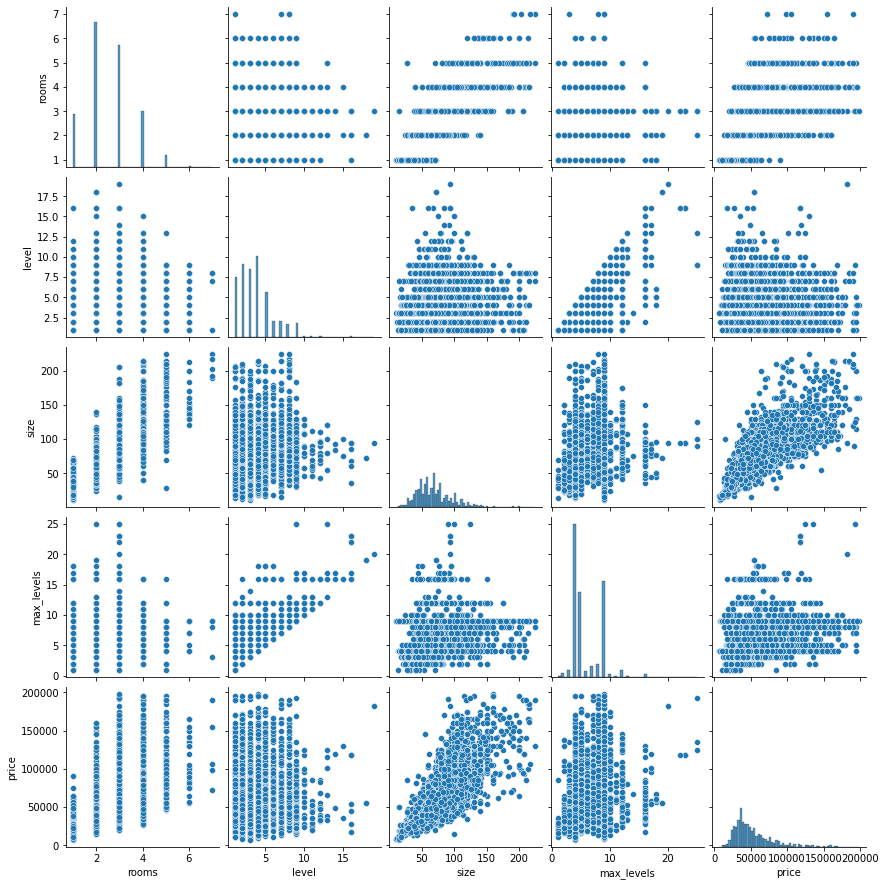

In [60]:
sb.pairplot(data[['rooms','level','size','max_levels','price']])
plt.show()

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7565 entries, 0 to 7564
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   location    7565 non-null   object
 1   district    7565 non-null   object
 2   rooms       7565 non-null   int64 
 3   size        7565 non-null   object
 4   level       7565 non-null   int64 
 5   max_levels  7565 non-null   int64 
 6   price       7565 non-null   object
dtypes: int64(3), object(4)
memory usage: 413.8+ KB


In [4]:
data.describe()

,rooms,level,max_levels
count,7565.000000,7565.000000,7565.000000
mean,2.625644,3.699273,6.038202
std,1.085201,2.237275,2.613271
min,1.000000,1.000000,1.000000
25%,2.000000,2.000000,4.000000
50%,3.000000,3.000000,5.000000
75%,3.000000,5.000000,9.000000
max,10.000000,19.000000,25.000000


# 2-step. Malumotlarni normallashtiramiz

In [262]:
data=data.drop('location',axis=1)

In [288]:
# malumotlarni normallashtiramiz
data[data['size']>=100]

,district,rooms,size,level,max_levels,price
37,5,4,100.0,3,12,55000
45,9,3,102.0,7,12,88784
47,6,4,100.0,1,4,97000
64,5,5,120.0,9,9,52000
65,5,4,110.0,3,3,91000
...,...,...,...,...,...,...
7248,2,5,135.0,1,5,80000
7250,4,4,100.0,2,9,38000
7259,8,4,107.0,5,5,45000
7266,8,3,137.0,5,9,86000


In [264]:
data['level'].unique()

array([ 4,  1,  3,  2,  5,  6,  7,  9, 11, 18,  8, 10, 16, 12, 13, 14, 15,
       19], dtype=int64)

In [265]:
data['rooms'].unique()

array([ 3,  2,  1,  4,  5,  8,  6,  7, 10], dtype=int64)

In [7]:
data['district'].unique()

array([ 8,  9,  6,  5,  2, 11,  1,  7,  3,  4, 10,  0])

In [267]:
# malumotlarni tozalash
data=data[data['price']!='Договорная']
data=data[data['price'].astype(float)<float('200000')]
data=data[data['size']!='Площадьземли:1сот']
data

,district,rooms,size,level,max_levels,price
0,Юнусабадский,3,57,4,4,52000
1,Яккасарайский,2,52,4,5,56000
2,Чиланзарский,2,42,4,4,37000
3,Чиланзарский,3,65,1,4,49500
4,Чиланзарский,3,70,3,5,55000
...,...,...,...,...,...,...
7560,Яшнободский,1,38,5,5,24500
7561,Яшнободский,2,49,1,4,32000
7562,Шайхантахурский,2,64,3,9,40000
7563,Мирзо-Улугбекский,1,18,1,4,11000


# Tayyorlangan malumotni yuklab olamiz

In [268]:
data.to_csv('Toshkent_uylari_cost.csv',index=False)

# 4-step.Filterlangan datani qayta yuklash

In [2]:
data=pd.read_csv('Toshkent_uylari_cost.csv')
data

,district,rooms,size,level,max_levels,price
0,Юнусабадский,3,57.0,4,4,52000
1,Яккасарайский,2,52.0,4,5,56000
2,Чиланзарский,2,42.0,4,4,37000
3,Чиланзарский,3,65.0,1,4,49500
4,Чиланзарский,3,70.0,3,5,55000
...,...,...,...,...,...,...
7287,Яшнободский,1,38.0,5,5,24500
7288,Яшнободский,2,49.0,1,4,32000
7289,Шайхантахурский,2,64.0,3,9,40000
7290,Мирзо-Улугбекский,1,18.0,1,4,11000


# 5-step.Object yani string elementlarga qayta nom beramiz raqamli beramiz
 > Encoding
 > Labelling

In [3]:
data_1=data
Lab=LabelEncoder()
data_1.district = Lab.fit_transform(data_1.district)
data_1

,district,rooms,size,level,max_levels,price
0,8,3,57.0,4,4,52000
1,9,2,52.0,4,5,56000
2,6,2,42.0,4,4,37000
3,6,3,65.0,1,4,49500
4,6,3,70.0,3,5,55000
...,...,...,...,...,...,...
7287,11,1,38.0,5,5,24500
7288,11,2,49.0,1,4,32000
7289,7,2,64.0,3,9,40000
7290,2,1,18.0,1,4,11000


In [4]:
def flt(arr):
    a=[]
    for i in arr:
        a.append(float(i))
    return a

# room
dp_s=['3', ' 2', ' 1',  '4',  '5',  '8',  '6',  '7', '10']
dp=flt(dp_s)
data_1['rooms'].replace(dp_s,dp_s,inplace=True)

# size
dp_s=np.array(data_1['max_levels'].unique())
dp=flt(dp_s)
data_1['max_levels'].replace(dp_s,dp_s,inplace=True)

# level
dp_s=np.array(data_1['level'].unique())
dp=flt(dp_s)
data_1['level'].replace(dp_s,dp_s,inplace=True)
data_1

,district,rooms,size,level,max_levels,price
0,8,3,57.0,4,4,52000
1,9,2,52.0,4,5,56000
2,6,2,42.0,4,4,37000
3,6,3,65.0,1,4,49500
4,6,3,70.0,3,5,55000
...,...,...,...,...,...,...
7287,11,1,38.0,5,5,24500
7288,11,2,49.0,1,4,32000
7289,7,2,64.0,3,9,40000
7290,2,1,18.0,1,4,11000


# 7-step.Vizualizatsiya 
> matplotlib 

> Seaborn 

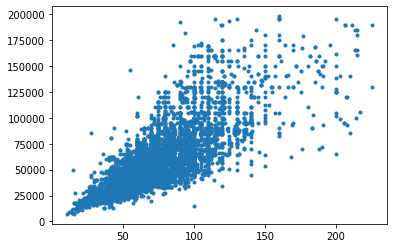

In [45]:
data_new = data_1[(data_1['price']>=4000) & (data_1['size']<=225) & (data_1['size']>=10) & (data_1['level']>0)]
x=data_new['size'].values
y=data_new['price'].values
plt.plot(x,y,".")
plt.show()

# 8-step.Malumotlarni X va Y ga ajratib o'qitamiz

In [48]:
datas=data_new.drop('price',axis=1)
target=data_new['price']
datas=np.array(datas)
datas

array([[ 8.,  3., 57.,  4.,  4.],
       [ 9.,  2., 52.,  4.,  5.],
       [ 6.,  2., 42.,  4.,  4.],
       ...,
       [ 7.,  2., 64.,  3.,  9.],
       [ 2.,  1., 18.,  1.,  4.],
       [ 6.,  1., 30.,  2.,  4.]])

In [49]:
ct = ColumnTransformer([("district", OneHotEncoder(), [0])], remainder = 'passthrough')
datas = ct.fit_transform(datas)
datas

array([[ 0.,  0.,  0., ..., 57.,  4.,  4.],
       [ 0.,  0.,  0., ..., 52.,  4.,  5.],
       [ 0.,  0.,  0., ..., 42.,  4.,  4.],
       ...,
       [ 0.,  0.,  0., ..., 64.,  3.,  9.],
       [ 0.,  0.,  1., ..., 18.,  1.,  4.],
       [ 0.,  0.,  0., ..., 30.,  2.,  4.]])

In [50]:
x_train,x_test,y_train,y_test=train_test_split(datas,target,random_state=42)

In [51]:
model.fit(x_train,y_train)

LinearRegression()

# Bashorat qiladi va aniqligini tekshiramiz

In [53]:
preds=model.predict(x_test)

In [52]:
model.score(x_test,y_test)

0.6914849519318038

In [66]:
#
model.predict([[0,0,0,0,0,0,0,0,1,0,0,0,2,50,3,5]])

array([39216.18461043])

In [54]:
pred=preds.reshape(-1)
pred

array([101319.23496495,  32663.78229833,  35165.75517888, ...,
        46452.40877003,  66902.68319897,  48628.30687334])

In [55]:
y_test1=np.array(y_test)

In [56]:
new_y=y_test1.reshape(-1)
new_y

array([118000,  44000,  34000, ...,  54000,  93000,  32000], dtype=int64)

In [58]:
A=pd.DataFrame({
    'Actual' : new_y,
    'predictions' : preds
})
A

,Actual,predictions
0,118000,101319.234965
1,44000,32663.782298
2,34000,35165.755179
3,35500,39083.213376
4,69000,81955.058084
...,...,...
1809,100000,92181.954852
1810,49500,47891.862216
1811,54000,46452.408770
1812,93000,66902.683199
